In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Read CSV and Display") \
    .getOrCreate()

24/05/17 22:07:24 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
# Read CSV file into Spark DataFrame
df_spark = spark.read.csv("/ProjectTweets.csv", header=False, inferSchema=True)

In [3]:
# Specify column names
column_names = ['Label', 'ID', 'Date', 'Query', 'User', 'Tweet']

In [4]:
# Assign column names to the DataFrame
df_spark = df_spark.toDF(*column_names)

In [5]:
# Display the first few rows of the DataFrame
df_spark.show(10)

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|    5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|    6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|    7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|    8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4

In [6]:
total_count = df_spark.count()
print("Total number of rows in the DataFrame:", total_count)

Total number of rows in the DataFrame: 1600000


In [7]:
# Assuming `df` is your Spark DataFrame
first_70000_rows = df_spark.limit(70000)

# Show the first few rows of the limited DataFrame
first_70000_rows.show()

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|    5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|    6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|    7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|    8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4

In [8]:
# Count the total number of rows in the DataFrame 'first_70000_rows'
total_count = first_70000_rows.count()
# Print the total number of rows in the DataFrame
print("Total number of rows in the DataFrame:", total_count)

Total number of rows in the DataFrame: 70000


In [9]:
# Assign the DataFrame 'first_70000_rows' to a new variable 'df_spark'
df_spark=first_70000_rows

In [10]:
# Print the schema of the DataFrame 'df_spark'
df_spark.printSchema()
# Display the first 5 rows of the DataFrame 'df_spark'
df_spark.show(5)

root
 |-- Label: integer (nullable = true)
 |-- ID: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- Query: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Tweet: string (nullable = true)

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+-----+----------+--------------------+--------+---------------+--------------------+
only

In [11]:
# Summary statistics
df_spark.describe().show()

24/05/17 22:07:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+--------------------+--------------------+--------+--------------------+--------------------+
|summary|             Label|                  ID|                Date|   Query|                User|               Tweet|
+-------+------------------+--------------------+--------------------+--------+--------------------+--------------------+
|  count|             70000|               70000|               70000|   70000|               70000|               70000|
|   mean|           34999.5|1.5990633598456428E9|                null|    null|1.7648189042857143E8|                null|
| stddev|20207.403758688713|  7.56589077970432E7|                null|    null|  5.28144166476119E8|                null|
|    min|                 0|          1467810369|Fri Apr 17 20:30:...|NO_QUERY|            006jazzy|           FUCK YOU!|
|    max|             69999|          1693506518|Tue Apr 21 04:17:...|NO_QUERY|              zzsiob|ï¿½petasin jï¿½el...|
+-------+---------------

In [12]:
# Count the total number of rows in the DataFrame 'df_spark'
total_rows = df_spark.count()
# Print the total number of rows in the DataFrame using an f-string for formatting
print(f"Total number of rows: {total_rows}")

Total number of rows: 70000


In [13]:
# List of column names to be dropped from the DataFrame
columns_to_drop = ['ID', 'Query', 'User'] 

In [14]:
# Drop columns that are not useful
df_cleaned = df_spark.drop(*columns_to_drop)

In [15]:
# Display the cleaned DataFrame
df_cleaned.show(10) 

+-----+--------------------+--------------------+
|Label|                Date|               Tweet|
+-----+--------------------+--------------------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|
|    1|Mon Apr 06 22:19:...|is upset that he ...|
|    2|Mon Apr 06 22:19:...|@Kenichan I dived...|
|    3|Mon Apr 06 22:19:...|my whole body fee...|
|    4|Mon Apr 06 22:19:...|@nationwideclass ...|
|    5|Mon Apr 06 22:20:...|@Kwesidei not the...|
|    6|Mon Apr 06 22:20:...|         Need a hug |
|    7|Mon Apr 06 22:20:...|@LOLTrish hey  lo...|
|    8|Mon Apr 06 22:20:...|@Tatiana_K nope t...|
|    9|Mon Apr 06 22:20:...|@twittera que me ...|
+-----+--------------------+--------------------+
only showing top 10 rows



In [16]:
# Identify and remove duplicate rows based on all columns
df_no_duplicates = df_cleaned.dropDuplicates()

In [17]:
# Drop duplicate rows based on the 'Tweet' column and create a new DataFrame 'df_no_duplicates'
df_no_duplicates = df_cleaned.dropDuplicates(['Tweet'])

In [18]:
# Count the number of rows after removing duplicates
num_rows_without_duplicates = df_no_duplicates.count()

In [19]:
# Print the count of duplicate rows removed
num_duplicate_rows = df_cleaned.count() - num_rows_without_duplicates
print(f"Number of duplicate rows removed: {num_duplicate_rows}")

Number of duplicate rows removed: 599


In [20]:
# Import the SparkSession class from the pyspark.sql module
from pyspark.sql import SparkSession
# Import the col, count, and when functions from the pyspark.sql.functions module
from pyspark.sql.functions import col, count, when

In [21]:
# Count the number of missing values (nulls) per column
missing_value_counts = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns]).show()

+-----+----+-----+
|Label|Date|Tweet|
+-----+----+-----+
|    0|   0|    0|
+-----+----+-----+



In [22]:
df_cleaned

DataFrame[Label: int, Date: string, Tweet: string]

In [23]:
# Import the udf (User Defined Function) from pyspark.sql.functions module
# Import the StringType class from pyspark.sql.types module
# Import the re (regular expressions) module for string operations
# Import the string module for string constants and operations

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
import string

In [24]:
# Define text cleaning function
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [25]:
# Register the text cleaning function as a Spark UDF
clean_text_udf = udf(text_clean_1, StringType())

In [26]:
# Apply the UDF to clean the 'text' column
cleaned_df = df_cleaned.withColumn('cleaned_text', clean_text_udf(df_cleaned['Tweet']))

In [27]:
# Show the cleaned DataFrame
cleaned_df.show(truncate=False)

+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|0    |Mon Apr 06 22:19:45 PDT 2009|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  |switchfoot   awww thats a bummer  you shoulda got d

In [28]:
# Define text cleaning function for Spark
def text_clean_2(text):
    text = re.sub('["“”...]', '', text)  # Remove quotes, ellipses, and other specified characters
    text = re.sub('\n', '', text)       # Remove newline characters
    return text

In [29]:
# Register the text_clean_2 function as a Spark UDF
clean_text2_udf = udf(text_clean_2, StringType())

In [30]:
# Apply the UDF to create a new column 'cleaned_text_new'
df_cleaned = cleaned_df.withColumn('cleaned_text_new', clean_text2_udf(col('cleaned_text')))


In [31]:
# Show the DataFrame with the new cleaned text column
df_cleaned.show(truncate=False)

+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |cleaned_text_new                                                                                             |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------

In [32]:
df_cleaned

DataFrame[Label: int, Date: string, Tweet: string, cleaned_text: string, cleaned_text_new: string]

In [33]:
# Get unique values from the 'cleaned_text_new' column using Spark SQL
unique_values = df_cleaned.select('cleaned_text_new').distinct().collect()

In [34]:
# Extract unique values from the collected DataFrame
unique_values_list = [row.cleaned_text_new for row in unique_values]


In [35]:
unique_values_list

['switchfoot   awww thats a bummer  you shoulda got david carr of third day to do it d',
 'is upset that he cant update his facebook by texting it and might cry as a result  school today also blah',
 'kenichan i dived many times for the ball managed to save   the rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 'nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there ',
 'kwesidei not the whole crew ',
 'need a hug ',
 'loltrish hey  long time no see yes rains a bit only a bit  lol  im fine thanks  hows you ',
 'tatianak nope they didnt have it ',
 'twittera que me muera  ',
 'spring break in plain city its snowing ',
 'i just repierced my ears ',
 'caregiving i couldnt bear to watch it  and i thought the ua loss was embarrassing     ',
 ' it it counts idk why i did either you never talk to me anymore ',
 'smarrison i wouldve been the first but i didnt have a gun    not really though zac snyders just a doucheclow

In [36]:
# Import the FloatType class from pyspark.sql.types module
# Import TextBlob for text processing and sentiment analysis
# Import nltk (Natural Language Toolkit) for tokenization
# Download the 'punkt' tokenizer from nltk (if not already downloaded)
from pyspark.sql.types import FloatType
from textblob import TextBlob
import nltk
nltk.download('punkt')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Define sentiment analysis function using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [38]:
# Register sentiment analysis function as a Spark UDF
sentiment_udf = udf(get_sentiment, FloatType())

In [39]:
# Apply sentiment analysis to each tweet and create a new column 'Sent'
df_with_sentiment = df_cleaned.withColumn('Sent', sentiment_udf(df_cleaned['Tweet']))

In [40]:
# Show the DataFrame with sentiment analysis results
df_with_sentiment.show(truncate=False)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-----------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |cleaned_text_new                                                                                             |Sent       |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------

In [41]:
# Display the first 2 rows of the DataFrame 'df_with_sentiment'
df_with_sentiment.show(2)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+--------------------+--------------------+--------------------+--------------------+----------+
|Label|                Date|               Tweet|        cleaned_text|    cleaned_text_new|      Sent|
+-----+--------------------+--------------------+--------------------+--------------------+----------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|switchfoot   awww...|switchfoot   awww...|0.21666667|
|    1|Mon Apr 06 22:19:...|is upset that he ...|is upset that he ...|is upset that he ...|       0.0|
+-----+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 2 rows



In [42]:
# Import col and round functions from pyspark.sql.functions module
# Import matplotlib.pyplot for plotting

from pyspark.sql.functions import col, round
import matplotlib.pyplot as plt

In [43]:
# Display the first 3 rows of the DataFrame 'df_with_sentiment'
df_with_sentiment.show(3)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+--------------------+--------------------+--------------------+--------------------+----------+
|Label|                Date|               Tweet|        cleaned_text|    cleaned_text_new|      Sent|
+-----+--------------------+--------------------+--------------------+--------------------+----------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|switchfoot   awww...|switchfoot   awww...|0.21666667|
|    1|Mon Apr 06 22:19:...|is upset that he ...|is upset that he ...|is upset that he ...|       0.0|
|    2|Mon Apr 06 22:19:...|@Kenichan I dived...|kenichan i dived ...|kenichan i dived ...|       0.5|
+-----+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 3 rows



In [44]:
# Count the total number of rows in the DataFrame 'df_with_sentiment'
# Print the total number of rows
total_rows = df_with_sentiment.count()
print(f"Total number of rows: {total_rows}")

Total number of rows: 70000


In [45]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
pd_distribution = df_with_sentiment.toPandas()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [46]:
# Display the first few rows of the PySpark DataFrame 'df_distribution'
pd_distribution.head()

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000
3,3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000
4,4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...,-0.625000


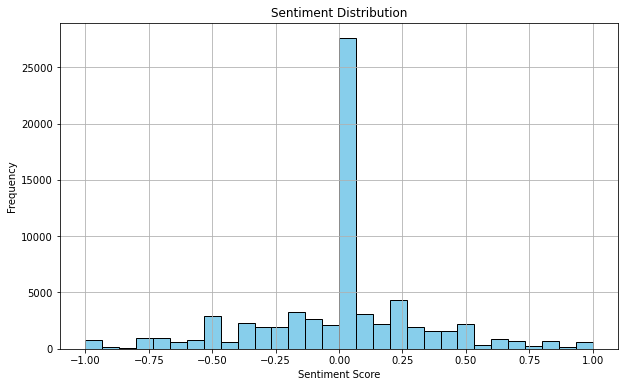

In [47]:
# Plotting the sentiment distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(pd_distribution['Sent'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
# Assign the pandas DataFrame 'pd_distribution' to a new variable 'df'
df=pd_distribution

In [49]:
df.head(3)

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000


In [50]:
# Adding a new column based on Polarity
df['Sentiment'] = df['Sent'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

df.head()

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000,positive
3,3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000,positive
4,4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...,-0.625000,negative


In [51]:
# Import seaborn for statistical data visualization
import seaborn as sns

/tmp/ipykernel_8561/537581451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment',data=df, palette='summer')


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

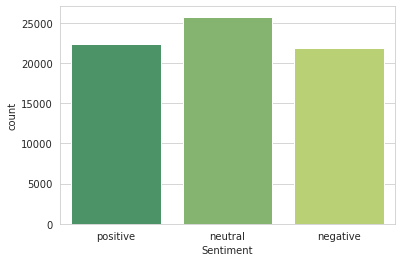

In [52]:
# Set the plotting style to 'whitegrid' using seaborn
sns.set_style('whitegrid')

# Create a count plot of 'Sentiment' column from DataFrame 'df' using seaborn
sns.countplot(x='Sentiment',data=df, palette='summer')

In [53]:
# Import necessary libraries and modules for text processing, modeling, and analysis

# Scikit-learn imports
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization of text data
from sklearn.pipeline import Pipeline  # For constructing pipelines of estimators
from sklearn.svm import SVC  # Support Vector Classifier for classification tasks
from sklearn.metrics import confusion_matrix  # For computing confusion matrix
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Data handling and preprocessing imports
import pandas as pd  # For data manipulation with DataFrames
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import re  # For regular expressions
from string import punctuation  # For string manipulation (e.g., removing punctuation)

# Natural Language Processing (NLP) imports
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # For removing stopwords from text
nltk.download('stopwords')  # Download NLTK stopwords data

# Data visualization imports
import matplotlib.pyplot as plt  # For creating visualizations with matplotlib

# Additional machine learning and deep learning imports
from sklearn.linear_model import LogisticRegression  # For logistic regression classifier
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to token counts
from sklearn.feature_extraction.text import TfidfTransformer  # For transforming token counts to TF-IDF

import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow.keras.models import Sequential  # Keras Sequential model for building neural networks
from tensorflow.keras.layers import Dense, Activation, Dropout  # Different layers for neural networks
from tensorflow.keras.callbacks import EarlyStopping  # For implementing early stopping during training


[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-05-17 22:08:17.197226: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 22:08:17.200705: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 22:08:17.241480: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 22:08:19.282036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [54]:
#Select the first 2000 rows from DataFrame df and assign it to a new DataFrame data
data= df.head(2000)

In [55]:
# Display summary information about the DataFrame data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             2000 non-null   int32  
 1   Date              2000 non-null   object 
 2   Tweet             2000 non-null   object 
 3   cleaned_text      2000 non-null   object 
 4   cleaned_text_new  2000 non-null   object 
 5   Sent              2000 non-null   float32
 6   Sentiment         2000 non-null   object 
dtypes: float32(1), int32(1), object(5)
memory usage: 93.9+ KB


In [56]:
# Import necessary library for splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define independent and dependent variables
independent_var = data['cleaned_text_new']  # Independent variable (features)
dependent_var = data['Sentiment']  # Dependent variable (target)

# Split the dataset into training and testing sets
IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

# Print the lengths of the training and testing sets
print('IV_train:', len(IV_train))  # Number of samples in the independent variable training set
print('IV_test:', len(IV_test))    # Number of samples in the independent variable testing set
print('DV_train:', len(DV_train))  # Number of samples in the dependent variable training set
print('DV_test:', len(DV_test))    # Number of samples in the dependent variable testing set


IV_train: 1800
IV_test: 200
DV_train: 1800
DV_test: 200


In [57]:
# Import necessary libraries and modules
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization of text data
from sklearn.linear_model import LogisticRegression  # For logistic regression classifier
from sklearn.pipeline import Pipeline  # For constructing a pipeline of estimators

# Initialize a TF-IDF Vectorizer
tvec = TfidfVectorizer()

# Initialize a Logistic Regression Classifier
# Using 'lbfgs' solver for optimization
clf2 = LogisticRegression(solver="lbfgs")

# Import Pipeline from sklearn
from sklearn.pipeline import Pipeline

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Creating a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer for feature extraction
    ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
])

In [59]:
model = Pipeline([('vectorizer' , tvec),('classifier',clf2)])
# Fit the model using the training data
model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix
# Predict the labels for the test data
predictions = model.predict(IV_test)
# Calculate and print the confusion matrix to evaluate the accuracy of the predictions
# DV_test: true labels for the test data
confusion_matrix(predictions, DV_test)

array([[43, 10,  9],
       [11, 53, 11],
       [ 8,  9, 46]])

In [60]:
# Import necessary metrics from scikit-learn for evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate and print the accuracy of the model
# Accuracy is the ratio of correctly predicted instances to the total instances
print("Accuracy :", accuracy_score(predictions, DV_test))
# Calculate and print the precision of the model
# Precision is the ratio of correctly predicted positive observations to the total predicted positives
# The 'weighted' average parameter accounts for label imbalance
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
# Calculate and print the recall of the model
# Recall (or sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.71
Precision : 0.7105871212121212
Recall : 0.71


In [61]:
# Define an example input for prediction
example = ['good']
# Use the trained model to predict the class of the example input
result = model.predict(example)
# Print the prediction result
print(result)

['positive']


In [62]:
# Define an example input for prediction
example = ['bad']
# Use the trained model to predict the class of the example input
result = model.predict(example)
# Print the prediction result
print(result)

['negative']


In [63]:
# Define an example input for prediction
example = ['ever']
# Use the trained model to predict the class of the example input
result = model.predict(example)
# Print the prediction result
print(result)

['neutral']


In [95]:
# Importing necessary libraries for text classification using TensorFlow
import matplotlib.pyplot as plt  # Library for plotting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to token counts
from sklearn.feature_extraction.text import TfidfTransformer  # For converting token counts to TF-IDF features

import tensorflow as tf  # TensorFlow library for building and training neural networks
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import Dense, Activation, Dropout  # Dense layers for fully connected networks, Activation for specifying activation functions, Dropout for regularization
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping callback to prevent overfitting


In [65]:
data.head(2)

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral


In [66]:
# Extract the time series data (Sentiment) from DataFrame
sentiment_series = data['Sent']

In [67]:
# Create DataFrame from the data dictionary
df = pd.DataFrame(data)

In [68]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_8561/646168968.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'])


In [69]:
# Check available columns in the DataFrame
print(df.columns)

Index(['Label', 'Date', 'Tweet', 'cleaned_text', 'cleaned_text_new', 'Sent',
       'Sentiment'],
      dtype='object')


In [70]:
# Extract only 'Date' and 'Sent' columns if they exist in the DataFrame
if 'Date' in df.columns and 'Sent' in df.columns:
    date_sent_df = df[['Date', 'Sent']]
    print(date_sent_df)
else:
    print("The 'Date' or 'Sent' column does not exist in the DataFrame.")

                    Date      Sent
0    2009-04-06 22:19:45  0.216667
1    2009-04-06 22:19:49  0.000000
2    2009-04-06 22:19:53  0.500000
3    2009-04-06 22:19:57  0.200000
4    2009-04-06 22:19:57 -0.625000
...                  ...       ...
1995 2009-04-07 00:43:16  0.000000
1996 2009-04-07 00:43:22  0.000000
1997 2009-04-07 00:43:26  0.062500
1998 2009-04-07 00:43:29 -0.400000
1999 2009-04-07 00:43:33 -0.775000

[2000 rows x 2 columns]


In [71]:
date_sent_df.head(5)

,Date,Sent
0,2009-04-06 22:19:45,0.216667
1,2009-04-06 22:19:49,0.000000
2,2009-04-06 22:19:53,0.500000
3,2009-04-06 22:19:57,0.200000
4,2009-04-06 22:19:57,-0.625000


In [72]:
df=date_sent_df

In [73]:
df.head(2)

,Date,Sent
0,2009-04-06 22:19:45,0.216667
1,2009-04-06 22:19:49,0.000000


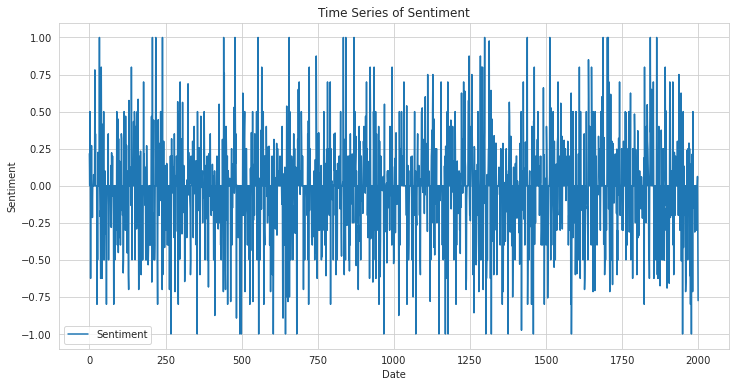

In [74]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index.to_numpy(), df['Sent'].to_numpy(), label='Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Time Series of Sentiment')
plt.legend()
plt.show()

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
# Define ARIMA model parameters
order = (1, 0, 0)  # ARIMA order (p, d, q)

# Fit ARIMA model
model = ARIMA(df['Sent'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sent   No. Observations:                 2000
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -629.760
Date:                Fri, 17 May 2024   AIC                           1265.520
Time:                        22:08:22   BIC                           1282.323
Sample:                             0   HQIC                          1271.690
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0234      0.007     -3.193      0.001      -0.038      -0.009
ar.L1         -0.0132      0.022     -0.599      0.549      -0.057       0.030
sigma2         0.1099      0.003     39.871      0.0

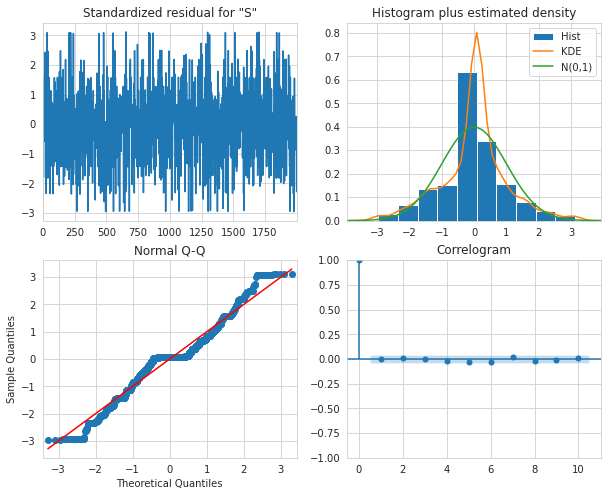

In [77]:
# Plot diagnostics of the model
results.plot_diagnostics(figsize=(10, 8))
plt.show()

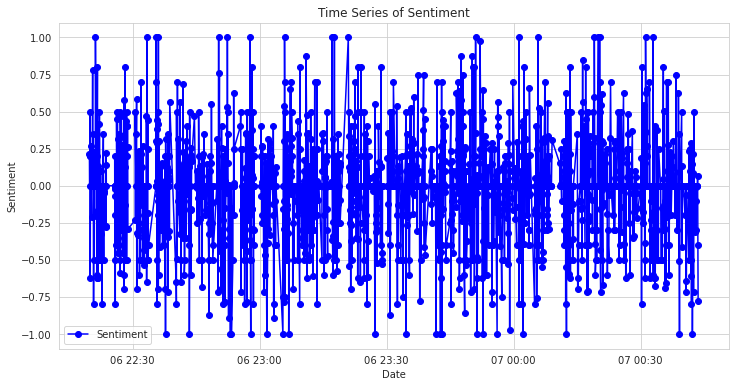

In [78]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values, df['Sent'].values, label='Sentiment', linestyle='-', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Time Series of Sentiment')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
pip install dash plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
import dash
from dash import dcc, html  # Import html module

import plotly.graph_objs as go
import pandas as pd

In [81]:


# Assuming df is your DataFrame with 'Date' and 'Sent' columns
df = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=100),
    'Sent': pd.Series([i for i in range(100)])  # Replace with your sentiment data
})
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is datetime

# Create the Dash app
app = dash.Dash(__name__)

# Create the layout
app.layout = html.Div(children=[
    html.H1(children='Time Series of Sentiment'),
    dcc.Graph(
        id='time-series-graph',
        figure={
            'data': [
                go.Scatter(
                    x=df['Date'],
                    y=df['Sent'],
                    mode='lines+markers',  # Lines with markers
                    line=dict(color='blue'),
                    marker=dict(symbol='circle', size=6),
                    name='Sentiment'
                )
            ],
            'layout': go.Layout(
                title='Time Series of Sentiment',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Sentiment'},
                showlegend=True
            )
        }
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [82]:
data.head(2)


,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral


In [83]:
df.head()

,Date,Sent
0,2020-01-01,0
1,2020-01-02,1
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,4


In [84]:
# Selecting columns 'cleaned_text_new' and 'Sentiment' from the DataFrame 'data'
df = data[['cleaned_text_new', 'Sentiment']]
df.head()

,cleaned_text_new,Sentiment
0,switchfoot awww thats a bummer you shoulda ...,positive
1,is upset that he cant update his facebook by t...,neutral
2,kenichan i dived many times for the ball manag...,positive
3,my whole body feels itchy and like its on fire,positive
4,nationwideclass no its not behaving at all im ...,negative


In [85]:
# Perform one-hot encoding on the 'Sentiment' column of the DataFrame 'df'
# Drop the original 'Sentiment' column from the DataFrame 'df'
# Concatenate the one-hot encoded columns with the DataFrame 'df'
# Display the first few rows of the modified DataFrame

one_hot = pd.get_dummies(df["Sentiment"])
df.drop(['Sentiment'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

/tmp/ipykernel_8561/318579932.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cleaned_text_new,negative,neutral,positive
0,switchfoot awww thats a bummer you shoulda ...,False,False,True
1,is upset that he cant update his facebook by t...,False,True,False
2,kenichan i dived many times for the ball manag...,False,False,True
3,my whole body feels itchy and like its on fire,False,False,True
4,nationwideclass no its not behaving at all im ...,True,False,False


In [86]:
# Assigning features to variable X and target variable to variable y
X = df['cleaned_text_new'].values
y = df.drop('cleaned_text_new', axis=1).values
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
# Create a CountVectorizer object to convert text documents into a matrix of token counts
# Fit the CountVectorizer on the training data and transform it
# Transform the test data using the fitted CountVectorizer
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [88]:
# Create a TfidfTransformer object to transform the text data into TF-IDF features
tfidf = TfidfTransformer()
# Fit the TfidfTransformer on the training data and transform it
X_train = tfidf.fit_transform(X_train)
# Transform the test data using the fitted TfidfTransformer
X_test = tfidf.transform(X_test)
# Convert the sparse matrix representation of the training and test data to dense arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

In [89]:
# Initialize a sequential model
model = Sequential()
# Add the first dense layer with 126 units and ReLU activation
# Dropout layer with 50% dropout rate to prevent overfitting
model.add(Dense(units=126,activation='relu'))
model.add(Dropout(0.5))
# Add the second dense layer with 400 units and ReLU activation
# Dropout layer with 50% dropout rate to prevent overfitting
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))
# Add the third dense layer with 500 units and ReLU activation
# Dropout layer with 50% dropout rate to prevent overfitting
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))
# Add the output layer with 3 units (one for each class) and softmax activation
# Softmax activation is used for multi-class classification
model.add(Dense(units=3, activation='softmax'))
# Define the optimizer with a learning rate of 0.001

opt=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
# loss: categorical crossentropy, suitable for multi-class classification
# optimizer: Adam optimizer with specified learning rate
# metrics: track accuracy during training and evaluation
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# Define the EarlyStopping callback
# monitor: 'val_loss' to monitor the validation loss
# mode: 'min' to stop training when the quantity monitored has stopped decreasing
# verbose: 1 to print a message when early stopping is triggered
# patience: number of epochs with no improvement after which training will be stopped
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [90]:
# Import the EarlyStopping callback from TensorFlow's Keras library
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
# Train the model on the training data with specified parameters
# X_train: independent variables (features) for the training dataset
# y_train: dependent variables (labels) for the training dataset
# batch_size: number of samples per gradient update
# epochs: number of epochs to train the model
# validation_data: data on which to evaluate the loss and any model metrics at the end of each epoch
# verbose: verbosity mode (1 = progress bar)
# callbacks: list of callbacks to apply during training (e.g., early stopping)

model.fit(X_train, y_train, batch_size=200, epochs=40, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


Epoch 1/40


2024-05-17 22:08:26.343242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23402400 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3335 - loss: 1.0985 - val_accuracy: 0.3433 - val_loss: 1.0976
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3610 - loss: 1.0940 - val_accuracy: 0.3433 - val_loss: 1.0973
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3838 - loss: 1.0849 - val_accuracy: 0.3500 - val_loss: 1.0922
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4294 - loss: 1.0648 - val_accuracy: 0.4400 - val_loss: 1.0728
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5529 - loss: 1.0080 - val_accuracy: 0.5033 - val_loss: 1.0179
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6805 - loss: 0.8299 - val_accuracy: 0.5783 - val_loss: 0.9146
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8528 - loss: 0.5208 - val_accuracy: 0.6033 - val_loss: 0.8896
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9407 - loss: 0.2261 - val_accuracy: 0.6300 - val_loss: 1.0106
Epoch 9/40


In [92]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 1.2493  
Test accuracy: 0.6266666650772095


In [93]:
# Use the trained model to predict the class labels for the test dataset
preds = model.predict(X_test)
# Display the predicted class labels
# This will output an array of predicted labels corresponding to the input features in X_test
preds

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.7758234 , 0.00742305, 0.2167535 ],
       [0.0114764 , 0.78774095, 0.20078269],
       [0.21831033, 0.65950084, 0.12218881],
       ...,
       [0.18928698, 0.20419484, 0.60651815],
       [0.00489806, 0.9874408 , 0.00766111],
       [0.00911187, 0.96907705, 0.021811  ]], dtype=float32)

In [94]:
# Display the shape of the predicted labels array
# preds: the array of predicted labels for the test dataset
preds.shape

(600, 3)